In [235]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_row', 5000)
pd.set_option('display.max_columns', 1000)
# 무시
pd.set_option('mode.chained_assignment',  None)

In [236]:
data = pd.read_csv('합격자 스펙 데이터 (1~100059).csv', encoding='cp949')
data1 = pd.read_csv('합격자 스펙 데이터 (100060~200126).csv', encoding='cp949')
data2 = pd.read_csv('합격자 스펙 데이터 (200127~278149).csv', encoding='cp949')

data = pd.concat([data, data1, data2])

In [237]:
data

,Unnamed: 0,합격회사,기업정보,지원분야,출신전공,스펙지수,학점,토익,토익스피킹,OPIC,외국어(기타),자격증,해외경험,인턴,수상내역,교내/사회/봉사
0,0,한국정보통신기술협회,"<span>협회·단체</span>,<span>754억</span>,<span>396...",2019년 하반기 \n기획 전략 경영,대졸4년제 농/수산/해양학계열 산림학전공,253,3.74/4.5,-,-,-,-,2개,-,-,-,1회
1,1,한국정보통신기술협회,"<span>협회·단체</span>,<span>754억</span>,<span>396...",2018년 하반기 \n비서 안내,초대졸 자연과학계열 관광경영계열 여행항공전공,246,4.35/4.5,-,-,-,-,6개,-,-,-,-
2,2,한국정보통신기술협회,"<span>협회·단체</span>,<span>754억</span>,<span>396...",2016년 하반기 \nQA 테스터 검증,지방4년제 공학계열 소프트웨어,140,3.19/4.5,-,-,-,-,-,-,-,-,-
3,3,한국정보통신기술협회,"<span>협회·단체</span>,<span>754억</span>,<span>396...",2016년 하반기 \n인사 노무 교육,서울4년제 공학계열 정보통신공학,314,3.43/4.5,-,Lv6,-,-,1개,1회,-,-,-
4,4,한국정보통신기술협회,"<span>협회·단체</span>,<span>754억</span>,<span>396...",2016년 상반기 \nQA 테스터 검증,수도권4년제 공학계열 정보통신,319,2.99/4.5,-,-,-,-,3개,-,1회,-,1회
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78018,278145,은산해운항공㈜,"<span>물류·운송·배송</span>,<span>1,576억 4,054만원</sp...",2008년 상반기 \n해외영업 무역영업,수도권4년제 무역,103,-,-,-,-,-,1개,-,-,-,-
78019,278146,은산해운항공㈜,"<span>물류·운송·배송</span>,<span>1,576억 4,054만원</sp...",2008년 상반기 \n해외영업 무역영업,지방4년제 상경계열 국제무역물류,347,4.23/4.5,825점,-,-,-,3개,-,-,-,-
78020,278147,은산해운항공㈜,"<span>물류·운송·배송</span>,<span>1,576억 4,054만원</sp...",2008년 상반기 \n해외영업 무역영업,지방4년제 어문학계열 영문,235,3.7/4.5,-,-,-,1개,1개,-,-,-,-
78021,278148,은산해운항공㈜,"<span>물류·운송·배송</span>,<span>1,576억 4,054만원</sp...",2007년 하반기 \n사무 총무 법무,초대졸 기타계열 호텔관광경영,245,4.3/4.5,-,-,-,-,3개,-,-,-,-


In [238]:
data['분기'] = data['지원분야'].str.split('\n').str[0]

In [239]:
data['부서'] = data['지원분야'].str.split('\n').str[1]

In [240]:
data.drop(['Unnamed: 0','지원분야'], axis=1, inplace=True)

In [241]:
a = data['출신전공'].str.contains('4년')
b = data['출신전공'].str.contains('초대졸')
c = data['출신전공'].str.contains('해외대학')
d = data['출신전공'].str.contains('대학원')
e = data['출신전공'].str.contains('고졸')

data['출신전공'][a] = '4년'
data['출신전공'][b] = '초대졸'
data['출신전공'][c] = '해외대학'
data['출신전공'][d] = '대학원'
data['출신전공'][e] = '고졸'

In [242]:
data['부서']=data['부서'].fillna('직무무관')

In [243]:
a = data['출신전공'].str.contains('4년')

In [244]:
a = data['부서'].str.contains('인사')
b = data['부서'].str.contains('사무')
c = data['부서'].str.contains('상담')
d = data['부서'].str.contains('조립')
e = data['부서'].str.contains('생산관리')
f = data['부서'].str.contains('서비스영업')
g = data['부서'].str.contains('보험영업')
h = data['부서'].str.contains('기술영업')
i = data['부서'].str.contains('법인영업')
j = data['부서'].str.contains('광고영업')
k = data['부서'].str.contains('해외영업')
k_1 = data['부서'].str.contains('아웃바운드TM')
l = data['부서'].str.contains('영업관리')
m = data['부서'].str.contains('전략')
n = data['부서'].str.contains('비서')
o = data['부서'].str.contains('마케팅')
o_1 = data['부서'].str.contains('광고제작')
p = data['부서'].str.contains('PR')
q = data['부서'].str.contains('상품기획 MD')
q_1 = data['부서'].str.contains('웹기획')
r = data['부서'].str.contains('디자인')
s = data['부서'].str.contains('홍보')
t = data['부서'].str.contains('퍼블리싱')
u = data['부서'].str.contains('프로그래머')
v = data['부서'].str.contains('통신기술')
w = data['부서'].str.contains('소프트웨어')
x = data['부서'].str.contains('인공지능')
y = data['부서'].str.contains('데이터베이스')
z = data['부서'].str.contains('네트워크')


data['부서'][a] = '인사'
data['부서'][b] = '사무'
data['부서'][c] = '상담'
data['부서'][d] = '생산조립'
data['부서'][e] = '생산관리'
data['부서'][f] = '영업'
data['부서'][g] = '영업'
data['부서'][h] = '영업'
data['부서'][i] = '영업'""
data['부서'][j] = '영업'
data['부서'][k] = '영업'
data['부서'][k_1] = '영업'
data['부서'][m] = '기획전략'
data['부서'][n] = '비서'
data['부서'][o] = '마케팅'
data['부서'][o_1] = '마케팅'
data['부서'][p] = '마케팅'
data['부서'][q] = '마케팅'
data['부서'][q_1] = '마케팅'
data['부서'][s] = '마케팅'
data['부서'][t] = '마케팅'
data['부서'][r] = '디자인'
data['부서'][u] = '프로그래머'
data['부서'][v] = '프로그래머'
data['부서'][w] = '프로그래머'
data['부서'][x] = '프로그래머'
data['부서'][y] = '프로그래머'
data['부서'][z] = '프로그래머'

In [245]:
data['출신전공'].replace('해외대학', 7, inplace=True)
data['출신전공'].replace('대학원', 6, inplace=True)
data['출신전공'].replace('4년', 5, inplace=True)
data['출신전공'].replace('초대졸', 4, inplace=True)
data['출신전공'].replace('고졸', 3, inplace=True)
data['출신전공'].replace('중졸', 2, inplace=True)
data['출신전공'].replace('초졸', 1, inplace=True)

In [246]:
data['자격증'].replace('-',0, inplace=True)
data['자격증'].replace('1개',1, inplace=True)
data['자격증'].replace('2개',2, inplace=True)
data['자격증'].replace('3개',3, inplace=True)
data['자격증'].replace('4개',4, inplace=True)
data['자격증'].replace('5개',5, inplace=True)
data['자격증'].replace('6개',6, inplace=True)
data['자격증'].replace('7개',7, inplace=True)
data['자격증'].replace('8개',8, inplace=True)
data['자격증'].replace('9개',9, inplace=True)
data['자격증'].replace('10개',10, inplace=True)
data['자격증'].replace('11개',11, inplace=True)
data['자격증'].replace('12개',12, inplace=True)
data['자격증'].replace('13개',13, inplace=True)
data['자격증'].replace('14개',14, inplace=True)
data['자격증'].replace('15개',15, inplace=True)
data['자격증'].replace('16개',16, inplace=True)

In [247]:
data['교내/사회/봉사'].replace('-',0, inplace=True)
data['교내/사회/봉사'].replace('1회',1, inplace=True)
data['교내/사회/봉사'].replace('2회',2, inplace=True)
data['교내/사회/봉사'].replace('3회',3, inplace=True)
data['교내/사회/봉사'].replace('4회',4, inplace=True)
data['교내/사회/봉사'].replace('5회',5, inplace=True)
data['교내/사회/봉사'].replace('6회',6, inplace=True)
data['교내/사회/봉사'].replace('7회',7, inplace=True)
data['교내/사회/봉사'].replace('8회',8, inplace=True)
data['교내/사회/봉사'].replace('9회',9, inplace=True)
data['교내/사회/봉사'].replace('10회',10, inplace=True)
data['교내/사회/봉사'].replace('11회',11, inplace=True)
data['교내/사회/봉사'].replace('12회',12, inplace=True)
data['교내/사회/봉사'].replace('13회',12, inplace=True)
data['교내/사회/봉사'].replace('14회',14, inplace=True)
data['교내/사회/봉사'].replace('-',0, inplace=True)


In [248]:
data['해외경험'].replace('-',0, inplace=True)
data['해외경험'].replace('1회',1, inplace=True)
data['해외경험'].replace('2회',2, inplace=True)
data['해외경험'].replace('3회',3, inplace=True)
data['해외경험'].replace('4회',4, inplace=True)
data['해외경험'].replace('5회',5, inplace=True)
data['해외경험'].replace('6회',6, inplace=True)
data['해외경험'].replace('11회',11, inplace=True)
data['해외경험'].replace('7회',7, inplace=True)
data['해외경험'].replace('14회',14, inplace=True)

In [249]:
data['인턴'].replace('-',0, inplace=True)
data['인턴'].replace('1회',1, inplace=True)
data['인턴'].replace('2회',2, inplace=True)
data['인턴'].replace('3회',3, inplace=True)
data['인턴'].replace('4회',4, inplace=True)
data['인턴'].replace('5회',5, inplace=True)
data['인턴'].replace('6회',6, inplace=True)
data['인턴'].replace('7회',7, inplace=True)
data['인턴'].replace('8회',8, inplace=True)
data['인턴'].replace('10회',10, inplace=True)
data['인턴'].replace('12회',12, inplace=True)
data['인턴'].replace('13회',13, inplace=True)
data['인턴'].replace('14회',14, inplace=True)
data['인턴'].replace('17회',17, inplace=True)
data['인턴'].replace('20회',21, inplace=True)
data['인턴'].replace('21회',21, inplace=True)



In [250]:
data['수상내역'].replace('-',0, inplace=True)
data['수상내역'].replace('1회',1, inplace=True)
data['수상내역'].replace('2회',2, inplace=True)
data['수상내역'].replace('3회',3, inplace=True)
data['수상내역'].replace('4회',4, inplace=True)
data['수상내역'].replace('5회',5, inplace=True)
data['수상내역'].replace('6회',6, inplace=True)
data['수상내역'].replace('7회',7, inplace=True)
data['수상내역'].replace('9회',9, inplace=True)
data['수상내역'].replace('14회',14, inplace=True)

In [251]:
data['외국어(기타)'].replace('-',0, inplace=True)
data['외국어(기타)'].replace('1개',1, inplace=True)
data['외국어(기타)'].replace('2개',2, inplace=True)
data['외국어(기타)'].replace('3개',3, inplace=True)
data['외국어(기타)'].replace('4개',4, inplace=True)

In [252]:
data['토익스피킹'].replace('Lv8',8, inplace=True)
data['토익스피킹'].replace('Lv7',7, inplace=True)
data['토익스피킹'].replace('Lv6',6, inplace=True)
data['토익스피킹'].replace('Lv5',5, inplace=True)
data['토익스피킹'].replace('Lv4',4, inplace=True)
data['토익스피킹'].replace('Lv3',3, inplace=True)
data['토익스피킹'].replace('Lv2',2, inplace=True)
data['토익스피킹'].replace('Lv1',1, inplace=True)
data['토익스피킹'].replace('-',0, inplace=True)

In [253]:
data['OPIC'].replace('-',0, inplace=True)
data['OPIC'].replace('AL',9, inplace=True)
data['OPIC'].replace('IH',8, inplace=True)
data['OPIC'].replace('IM3',7, inplace=True)
data['OPIC'].replace('IM2',6, inplace=True)
data['OPIC'].replace('IM1',5, inplace=True)
data['OPIC'].replace('IL',4, inplace=True)
data['OPIC'].replace('NH',3, inplace=True)
data['OPIC'].replace('NL',2, inplace=True)
data['OPIC'].replace('NM',1, inplace=True)

In [254]:
data.reset_index(drop=True, inplace=True)

In [255]:
data['토익'] = data[data['토익'].str.contains('점')]['토익'].str.replace('점',"")
data['학점'] = data[data['학점'].str.contains('/4.5')]['학점'].str.replace('/4.5',"")

In [256]:
data['토익']= data['토익'].fillna(0)
data['학점']= data['학점'].fillna(0)

In [257]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# encoder.fit(data['합격회사'])
# data['합격회사'] = encoder.transform(data['합격회사'])


In [258]:
data['기업정보'].value_counts()

<span>은행·금융</span>,<span>2조 7131억</span>,<span>2,229명 재직중</span>                                 3005
<span>은행·금융</span>,<span>3조 1,184억 9,593만원</span>,<span>2,174명 재직중</span>                        2592
<span></span>,<span></span>                                                                      2429
<span>시설관리·보안·경비</span>,<span>7156억</span>,<span>16,000명 재직중</span>                              2256
<span>전기·전자·제어</span>,<span>166조 3,111억 9,100만원</span>,<span>111,143명 재직중</span>                 2100
<span>공기업·공공기관</span>,<span>3,941억 9,956만원</span>,<span>10,641명 재직중</span>                       1657
<span>은행·금융</span>,<span>1조 4,962억 5,248만원</span>,<span>1,338명 재직중</span>                        1606
<span>은행·금융</span>,<span>3조 3022억원</span>,<span>2,419명 재직중</span>                                1564
<span>자동차·조선·철강·항공</span>,<span>1,723억 8,335만원</span>,<span>658명 재직중</span>                      1405
<span>반도체·디스플레이·광학</span>,<span>56조 9천억</span>,<span>39,611명 재직중</span>           

In [259]:
data['기업정보'] = data['기업정보'].str.replace('<span></span>,<span></span>','<span>기업정보없음</span>')
data['기업정보'] = data['기업정보'].str.replace('<span></span>,<span>0명 재직중</span>','<span>기업정보없음</span>')

In [260]:
data['기업정보'].value_counts()

<span>은행·금융</span>,<span>2조 7131억</span>,<span>2,229명 재직중</span>                                 3005
<span>은행·금융</span>,<span>3조 1,184억 9,593만원</span>,<span>2,174명 재직중</span>                        2592
<span>기업정보없음</span>                                                                              2455
<span>시설관리·보안·경비</span>,<span>7156억</span>,<span>16,000명 재직중</span>                              2256
<span>전기·전자·제어</span>,<span>166조 3,111억 9,100만원</span>,<span>111,143명 재직중</span>                 2100
<span>공기업·공공기관</span>,<span>3,941억 9,956만원</span>,<span>10,641명 재직중</span>                       1657
<span>은행·금융</span>,<span>1조 4,962억 5,248만원</span>,<span>1,338명 재직중</span>                        1606
<span>은행·금융</span>,<span>3조 3022억원</span>,<span>2,419명 재직중</span>                                1564
<span>자동차·조선·철강·항공</span>,<span>1,723억 8,335만원</span>,<span>658명 재직중</span>                      1405
<span>반도체·디스플레이·광학</span>,<span>56조 9천억</span>,<span>39,611명 재직중</span>           

In [261]:
data['기업정보'] = data['기업정보'].str.split('</span>').str[0]

In [262]:
data['기업정보']= data['기업정보'].str.split('>').str[1]

In [263]:
data['기업정보'].value_counts()

은행·금융                            32780
공기업·공공기관                         30464
전기·전자·제어                         24942
자동차·조선·철강·항공                     19559
백화점·유통·도소매                       15031
반도체·디스플레이·광학                     11035
음식료·외식·프랜차이즈                     10956
건설·시공·토목·조경                      10673
제약·보건·바이오                         9059
솔루션·SI·CRM·ERP                    8367
화학·에너지·환경                         6401
네트워크·통신서비스                        5943
호텔·여행·항공                          5270
기계·기계설비                           4840
학원·어학원·교육원                        4771
컴퓨터·하드웨어·장비                       4758
섬유·의류·패션                          4606
콜센터·아웃소싱·기타                       4603
식품가공                              3723
쇼핑몰·오픈마켓·소셜커머스                    3702
시설관리·보안·경비                        3518
금속·재료·자재                          3385
출판·인쇄·사진                          3354
생활용품·소비재·기타                       3265
물류·운송·배송                          3156
학습지·방문교육                 

In [264]:
data

,합격회사,기업정보,출신전공,스펙지수,학점,토익,토익스피킹,OPIC,외국어(기타),자격증,해외경험,인턴,수상내역,교내/사회/봉사,분기,부서
0,한국정보통신기술협회,협회·단체,5,253,3.74,0,0,0,0,2,0,0,0,1,2019년 하반기,기획전략
1,한국정보통신기술협회,협회·단체,4,246,4.35,0,0,0,0,6,0,0,0,0,2018년 하반기,비서
2,한국정보통신기술협회,협회·단체,5,140,3.19,0,0,0,0,0,0,0,0,0,2016년 하반기,QA 테스터 검증
3,한국정보통신기술협회,협회·단체,5,314,3.43,0,6,0,0,1,1,0,0,0,2016년 하반기,인사
4,한국정보통신기술협회,협회·단체,5,319,2.99,0,0,0,0,3,0,1,0,1,2016년 상반기,QA 테스터 검증
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278145,은산해운항공㈜,물류·운송·배송,5,103,0,0,0,0,0,1,0,0,0,0,2008년 상반기,영업
278146,은산해운항공㈜,물류·운송·배송,5,347,4.23,825,0,0,0,3,0,0,0,0,2008년 상반기,영업
278147,은산해운항공㈜,물류·운송·배송,5,235,3.7,0,0,0,1,1,0,0,0,0,2008년 상반기,영업
278148,은산해운항공㈜,물류·운송·배송,4,245,4.3,0,0,0,0,3,0,0,0,0,2007년 하반기,사무


In [265]:
data['OPIC'].value_counts()

0    268467
8      2862
6      2569
4      1347
9      1133
5      1080
7       548
3       119
2        14
1        11
Name: OPIC, dtype: int64

--------------------------------------여기까지---------------------------------------------

In [266]:
X = data.iloc[:, 2:14]

In [267]:
y=data.iloc[:, -1]

In [268]:
y=pd.get_dummies(y)

In [269]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=34)

In [270]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import classification_report
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import roc_auc_score , plot_roc_curve, accuracy_score
# from sklearn import metrics
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# import xgboost as xgb

# rf = RandomForestClassifier()
# dt = DecisionTreeClassifier()
# kn = KNeighborsClassifier()
# lr = LogisticRegression()
# svc = SVC(random_state = 43, C = 10, gamma = 0.1, kernel ='rbf')

# models = [rf, dt, kn, lr, svc]
# for model in models:
#     model.fit(X_train, y_train)
#     pre = model.predict(X_test)
#     scores = cross_val_score(model, X_test, y_test, cv=5).mean().round(3)
#     #f1score = metrics.f1_score(y_test, y_pred).round(3)
#     print(model, '\n', 'Accuracy:', scores, '\n')

In [271]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# lr = LinearRegression()
# lr.fit(X_train, y_train)

In [272]:
# lr.score(X_test, y_test)

In [273]:
data['부서'].value_counts()

영업                 31417
직무무관               30223
사무                 25235
상담                 17718
생산조립               16064
마케팅                12595
프로그래머              12150
생산관리               11999
영업관리 지원 영업기획       10084
판매 서빙 매장관리          8650
경리 회계 결산            8339
시설 보안 경비 안전         6652
기획전략                6408
디자인                 5588
인사                  5570
비서                  5491
요리 영양 제과제빵 바리스타     4914
유통 물류 재고            4741
자동차 조선 기계           3642
화학 에너지 환경           3587
설치 정비 A/S           3528
구매 자재               3266
시공 현장 감리 공무         3156
전기 전자 제어            3073
반도체 디스플레이           3020
채권 심사 보험 보상         3002
배송 택배 운송            2465
포장 가공               2287
건축 설계 인테리어          2263
기계설계 CAD CAM        2162
외국어 번역 통역           2051
재무 세무 IR            1907
학습지 과외 방문교사         1835
리서치 통계 설문           1450
QA 테스터 검증           1418
컨텐츠 사이트운영           1109
ERP 시스템분석 설계        1055
초중고 특수학교             950
영상 사진 촬영             812
자격증 기술 전문교육          786


In [274]:
list1 = ['ERP 시스템분석 설계','초중고 특수학교','영상 사진 촬영','자격증 기술 전문교육','감독 연출 PD','경영분석 컨설턴트',
         '의사 치과 한의사','기자','뷰티 미용 애완','회계 세무 CPA','작가 시나리오','법률 특허 상표','사회복지 요양보호 자원봉사',
         '부동산 중개 분양 경매','공연 전시 무대 스텝','음악 음향','이벤트 웨딩 도우미','아나운서 리포터 성우','전기 소방 통신 안전',
         '캐릭터 애니메이션','연예 엔터테인먼트','바이오 제약 식품','여행 항공 숙박','연구소 R&D','토목 조경 도시 측량','환경 플랜트'
         ,'외국어교육','전시 컨벤션','대학교수 강사 행정직','CS관리 강의','간호사','섬유 의류 패션','의료직기타','방송 케이블 프로덕션',
         '운전 기사','출판 인쇄 사진','게임','영화 배급','영화 음반 배급','레저 스포츠','보습학원 입시학원','시설 보안 경비 안전','기획전략',
         '디자인','인사','비서','요리 영양 제과제빵 바리스타','유통 물류 재고','자동차 조선 기계','화학 에너지 환경','설치 정비 A/S','구매 자재',
         '시공 현장 감리 공무','전기 전자 제어','반도체 디스플레이','채권 심사 보험 보상','배송 택배 운송','포장 가공','건축 설계 인테리어','기계설계 CAD CAM',
          '외국어 번역 통역','재무 세무 IR','학습지 과외 방문교사','리서치 통계 설문','QA 테스터 검증','컨텐츠 사이트운영','생산조립',
        '마케팅','프로그래머','생산관리','영업관리 지원 영업기획']

for i in range(len(list1)):
    idx = data[data['부서'] == list1[i]].index
    data = data.drop(idx)



In [275]:
list1

['ERP 시스템분석 설계',
 '초중고 특수학교',
 '영상 사진 촬영',
 '자격증 기술 전문교육',
 '감독 연출 PD',
 '경영분석 컨설턴트',
 '의사 치과 한의사',
 '기자',
 '뷰티 미용 애완',
 '회계 세무 CPA',
 '작가 시나리오',
 '법률 특허 상표',
 '사회복지 요양보호 자원봉사',
 '부동산 중개 분양 경매',
 '공연 전시 무대 스텝',
 '음악 음향',
 '이벤트 웨딩 도우미',
 '아나운서 리포터 성우',
 '전기 소방 통신 안전',
 '캐릭터 애니메이션',
 '연예 엔터테인먼트',
 '바이오 제약 식품',
 '여행 항공 숙박',
 '연구소 R&D',
 '토목 조경 도시 측량',
 '환경 플랜트',
 '외국어교육',
 '전시 컨벤션',
 '대학교수 강사 행정직',
 'CS관리 강의',
 '간호사',
 '섬유 의류 패션',
 '의료직기타',
 '방송 케이블 프로덕션',
 '운전 기사',
 '출판 인쇄 사진',
 '게임',
 '영화 배급',
 '영화 음반 배급',
 '레저 스포츠',
 '보습학원 입시학원',
 '시설 보안 경비 안전',
 '기획전략',
 '디자인',
 '인사',
 '비서',
 '요리 영양 제과제빵 바리스타',
 '유통 물류 재고',
 '자동차 조선 기계',
 '화학 에너지 환경',
 '설치 정비 A/S',
 '구매 자재',
 '시공 현장 감리 공무',
 '전기 전자 제어',
 '반도체 디스플레이',
 '채권 심사 보험 보상',
 '배송 택배 운송',
 '포장 가공',
 '건축 설계 인테리어',
 '기계설계 CAD CAM',
 '외국어 번역 통역',
 '재무 세무 IR',
 '학습지 과외 방문교사',
 '리서치 통계 설문',
 'QA 테스터 검증',
 '컨텐츠 사이트운영',
 '생산조립',
 '마케팅',
 '프로그래머',
 '생산관리',
 '영업관리 지원 영업기획']

In [289]:
list2 = data[data['스펙지수'] <= 700].index
list2

for i in range(len(list2)):
    data.drop(list2[i], inplace=True)


Int64Index([     5,     13,     19,     37,    110,    112,    140,    364,
               395,    411,
            ...
            276870, 276880, 277323, 277473, 277476, 277477, 277498, 277613,
            278128, 278136],
           dtype='int64', length=2162)

In [290]:
data

,합격회사,기업정보,출신전공,스펙지수,학점,토익,토익스피킹,OPIC,외국어(기타),자격증,해외경험,인턴,수상내역,교내/사회/봉사,분기,부서
375,(주)LG화학,화학·에너지·환경,5,775,4.22,950,0,8,3,2,2,1,0,3,2018년 하반기,영업
387,(주)LG화학,화학·에너지·환경,5,811,4.31,970,7,0,1,3,2,0,2,3,2018년 상반기,영업
396,(주)LG화학,화학·에너지·환경,5,811,4.31,970,7,0,1,3,2,0,2,3,2018년 상반기,영업
2233,(주)판토스,물류·운송·배송,5,811,4.31,970,7,0,1,3,2,0,2,3,2018년 하반기,영업
2237,(주)판토스,물류·운송·배송,5,811,4.31,970,7,0,1,3,2,0,2,3,2018년 하반기,영업
2263,(주)판토스,물류·운송·배송,5,779,4.21,895,6,0,1,4,2,3,2,0,2015년 하반기,영업
2310,(주)판토스,물류·운송·배송,5,766,3.55,980,6,0,2,2,1,1,2,2,2012년 상반기,영업
2331,(주)판토스,물류·운송·배송,5,761,3.8,710,6,0,0,3,2,1,2,3,2011년 상반기,사무
7339,현대건설(주),건설·시공·토목·조경,5,713,4.04,930,0,0,0,3,3,3,1,4,2014년 상반기,사무
8014,한국 후지필름 비지니스 이노베이션㈜,컴퓨터·하드웨어·장비,5,724,3.99,0,0,8,0,2,3,7,2,9,2020년 상반기,영업


In [291]:
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('font',family="Malgun Gothic")

<AxesSubplot:xlabel='합격회사'>

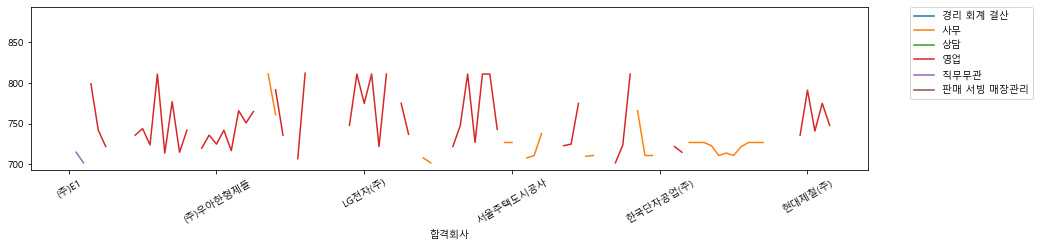

In [315]:
p = data.pivot_table(index="합격회사", columns="부서", values="스펙지수")
p.plot(figsize=(15, 3), rot=30)
# 그래프의 밖에 legend 표시하도록 설정
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

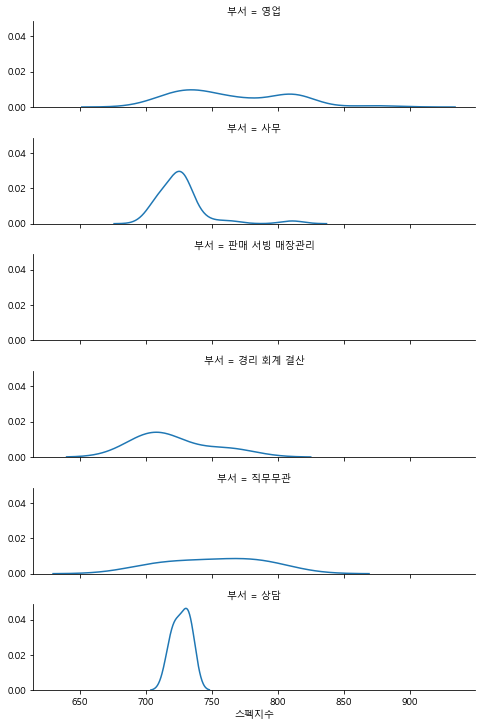

In [325]:
g = sns.FacetGrid(data, row="부서",
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "스펙지수");

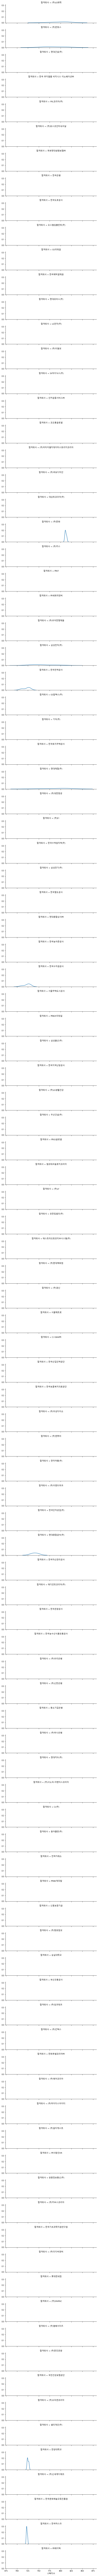

In [326]:
g = sns.FacetGrid(data, row="합격회사",
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "스펙지수");

In [347]:
t = pd.pivot_table(data, index="합격회사", columns="부서", 
                   values="스펙지수").round()

<Figure size 1800x2016 with 0 Axes>

<AxesSubplot:xlabel='부서', ylabel='합격회사'>

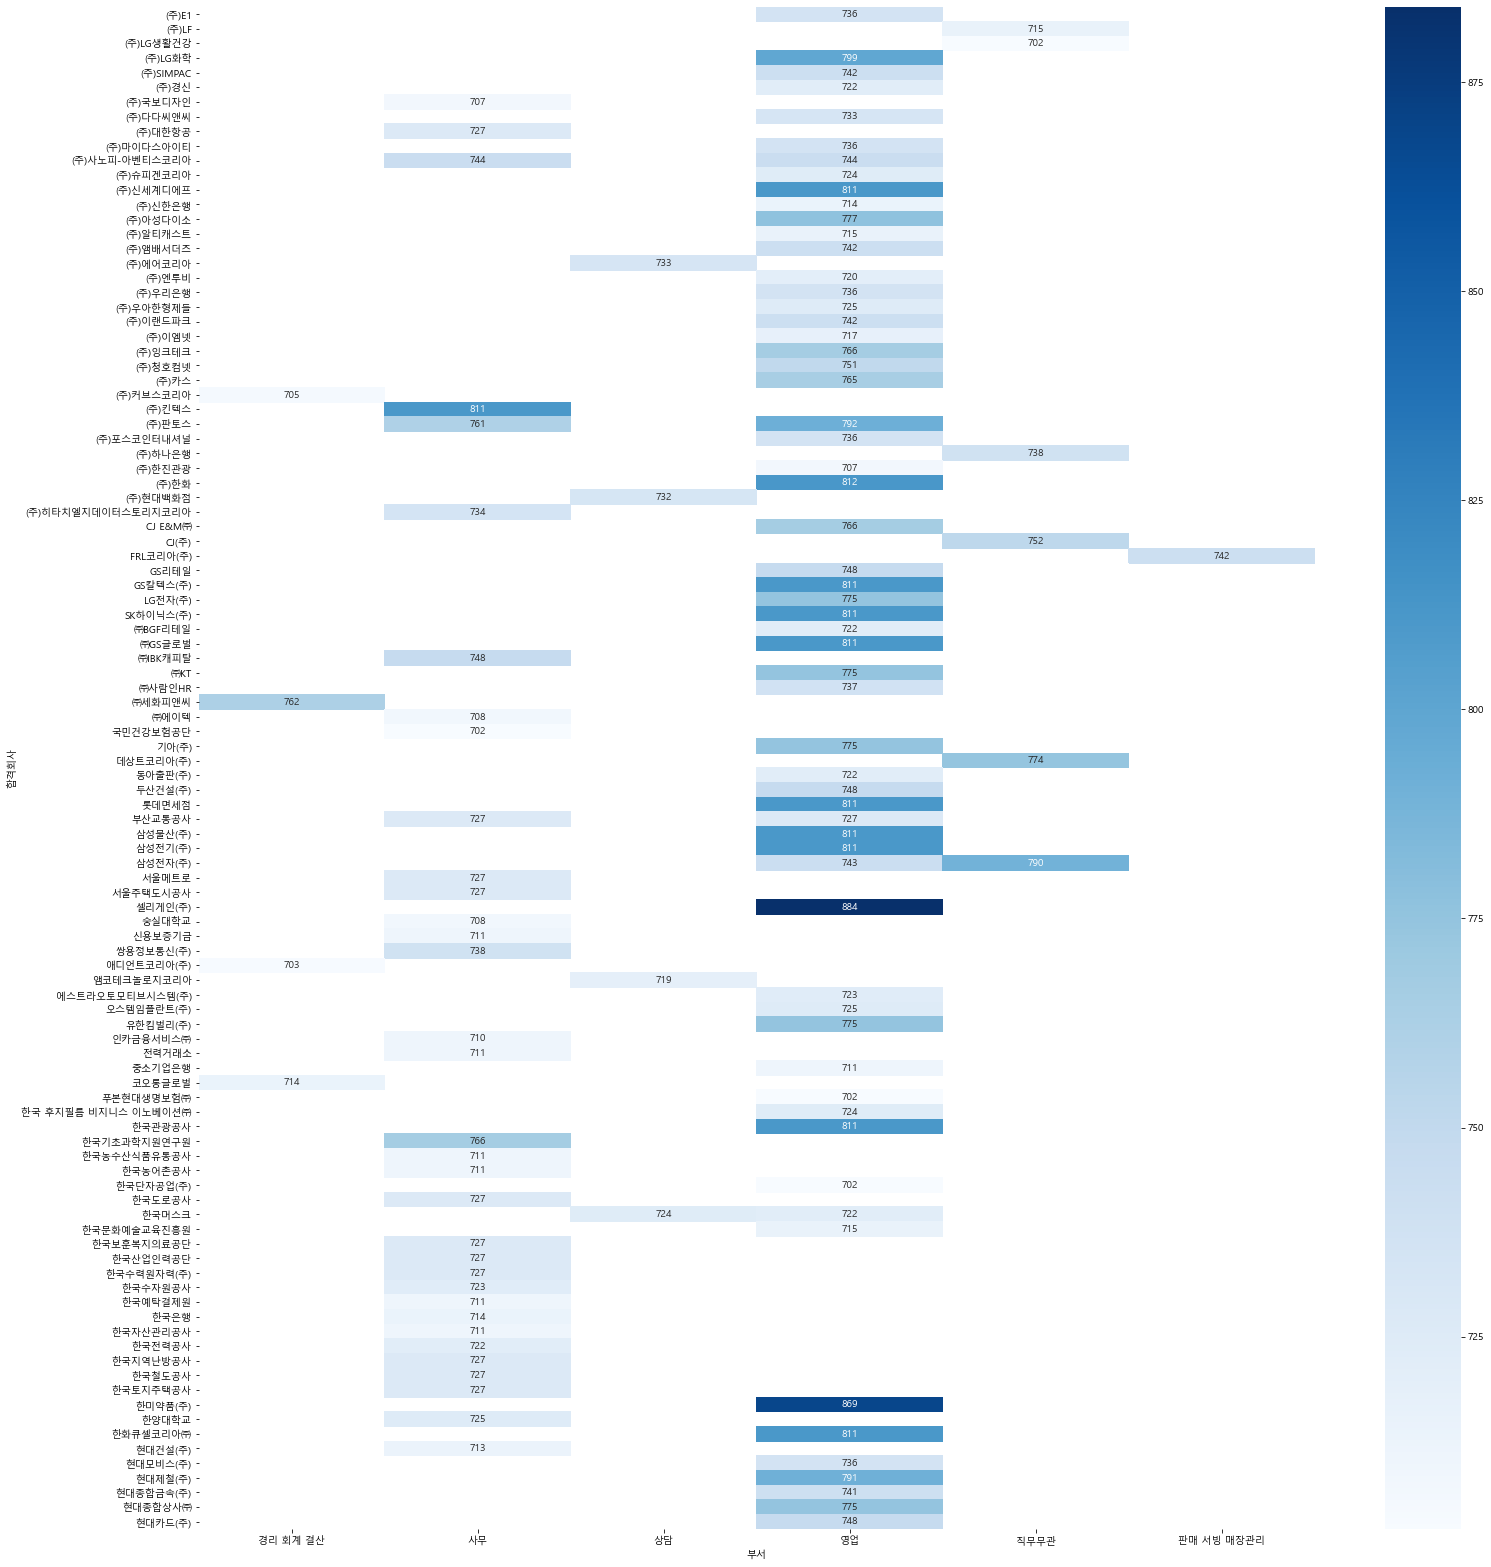

In [348]:
plt.figure(figsize=(25, 28))
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")

<Figure size 1800x2016 with 0 Axes>

<AxesSubplot:xlabel='부서', ylabel='합격회사'>

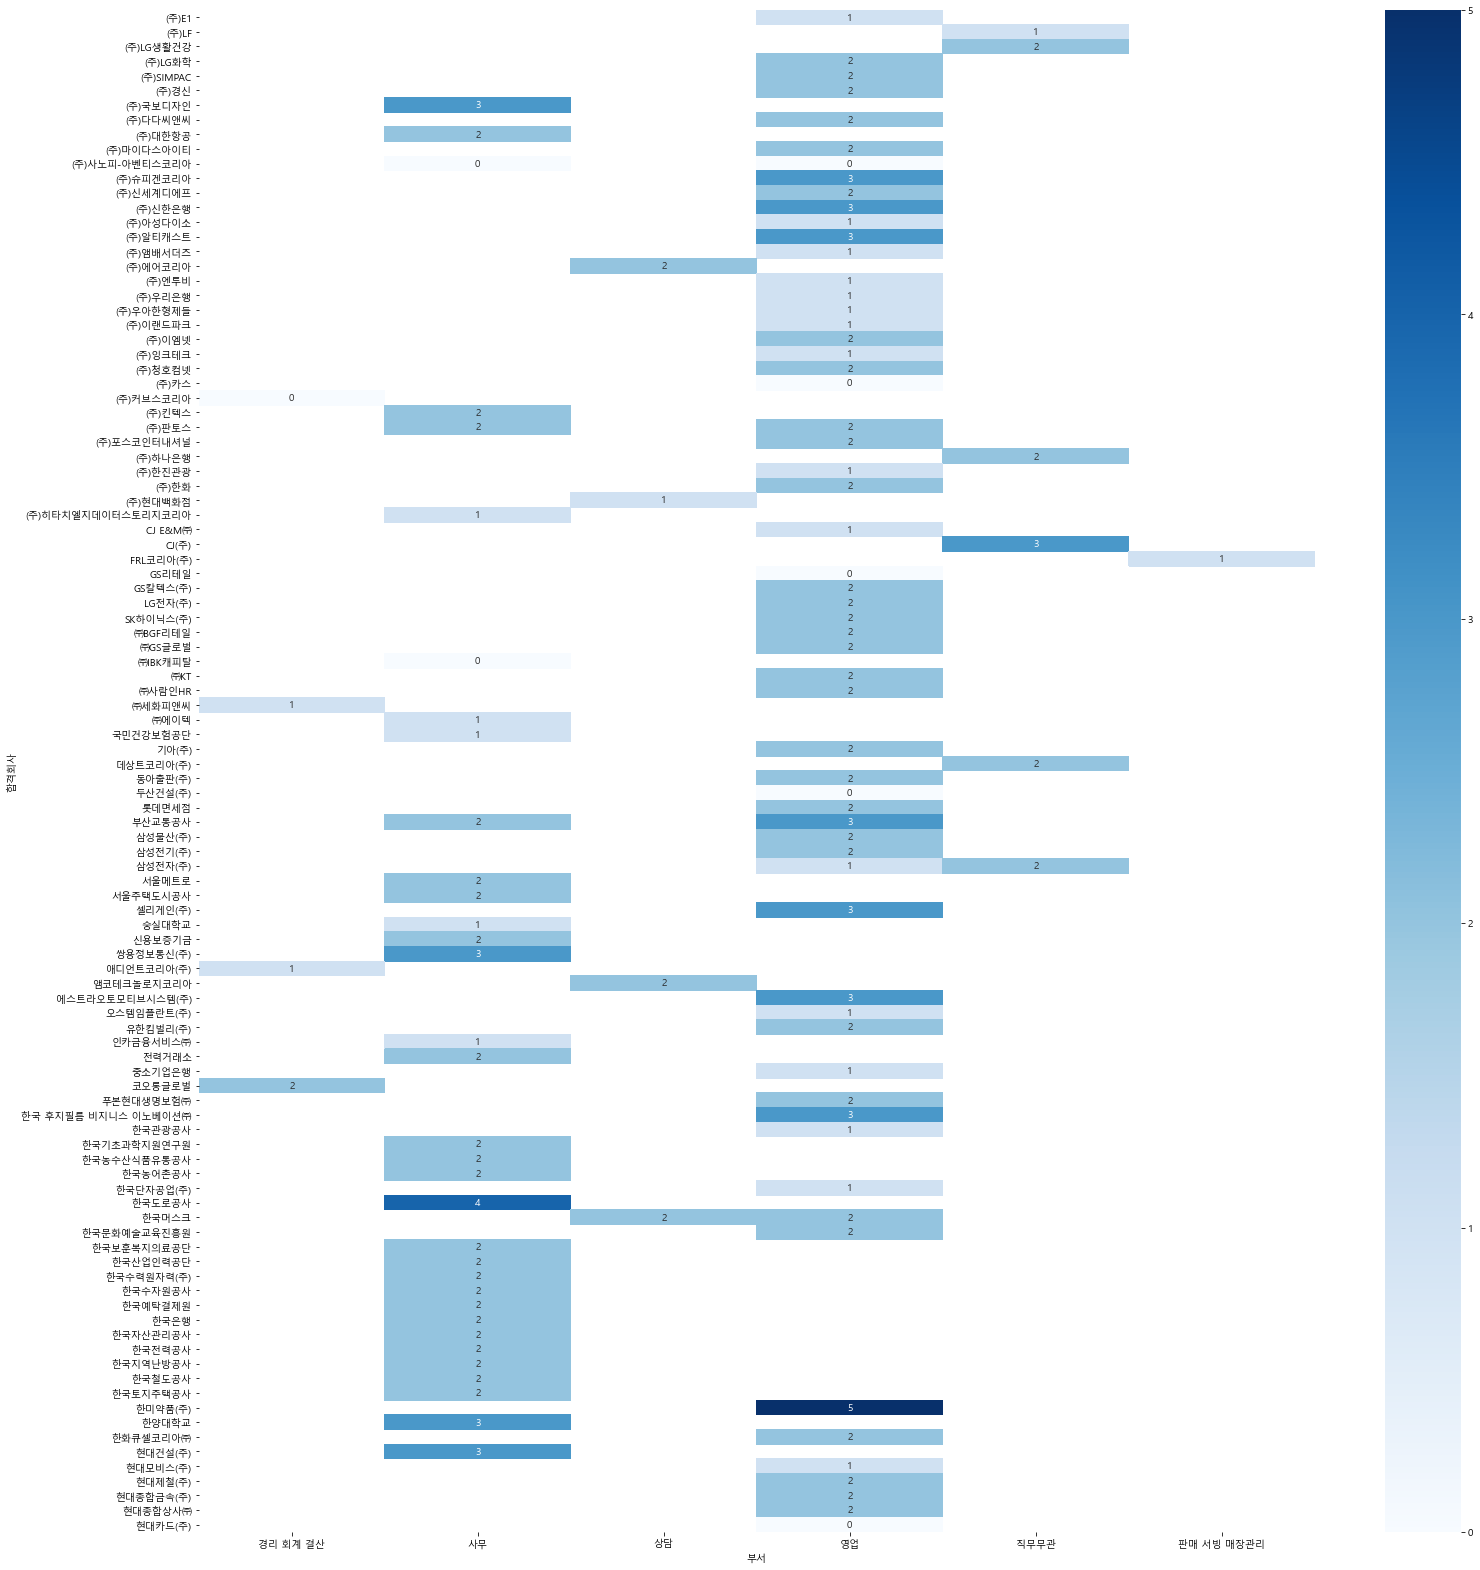

In [353]:
t = pd.pivot_table(data, index="합격회사", columns="부서", 
                   values="해외경험").round()
plt.figure(figsize=(25, 28))
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")

<Figure size 1800x2016 with 0 Axes>

<AxesSubplot:xlabel='출신전공', ylabel='합격회사'>

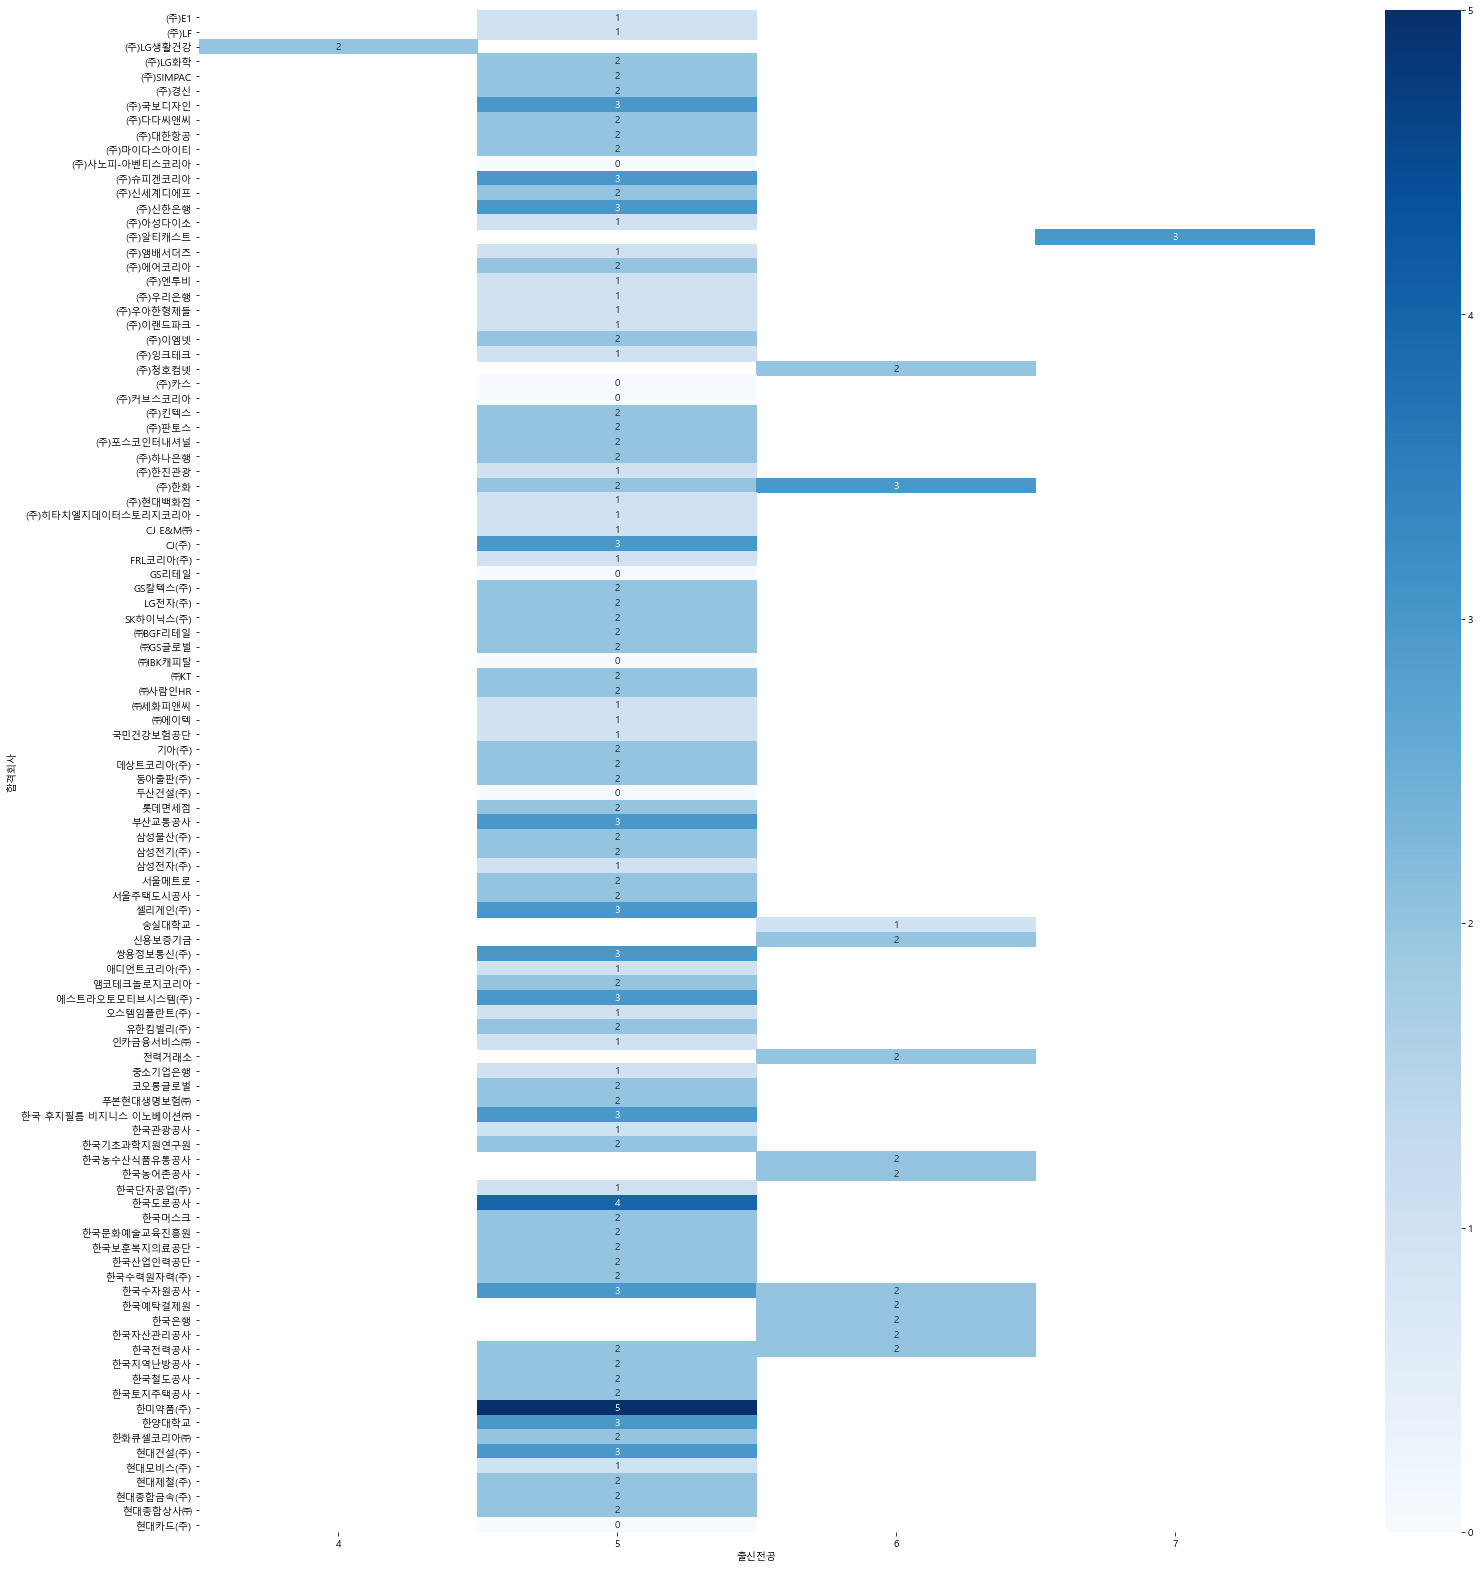

In [354]:
t = pd.pivot_table(data, index="합격회사", columns="출신전공", 
                   values="해외경험").round()
plt.figure(figsize=(25, 28))
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")

<Figure size 1800x2016 with 0 Axes>

<AxesSubplot:xlabel='토익', ylabel='합격회사'>

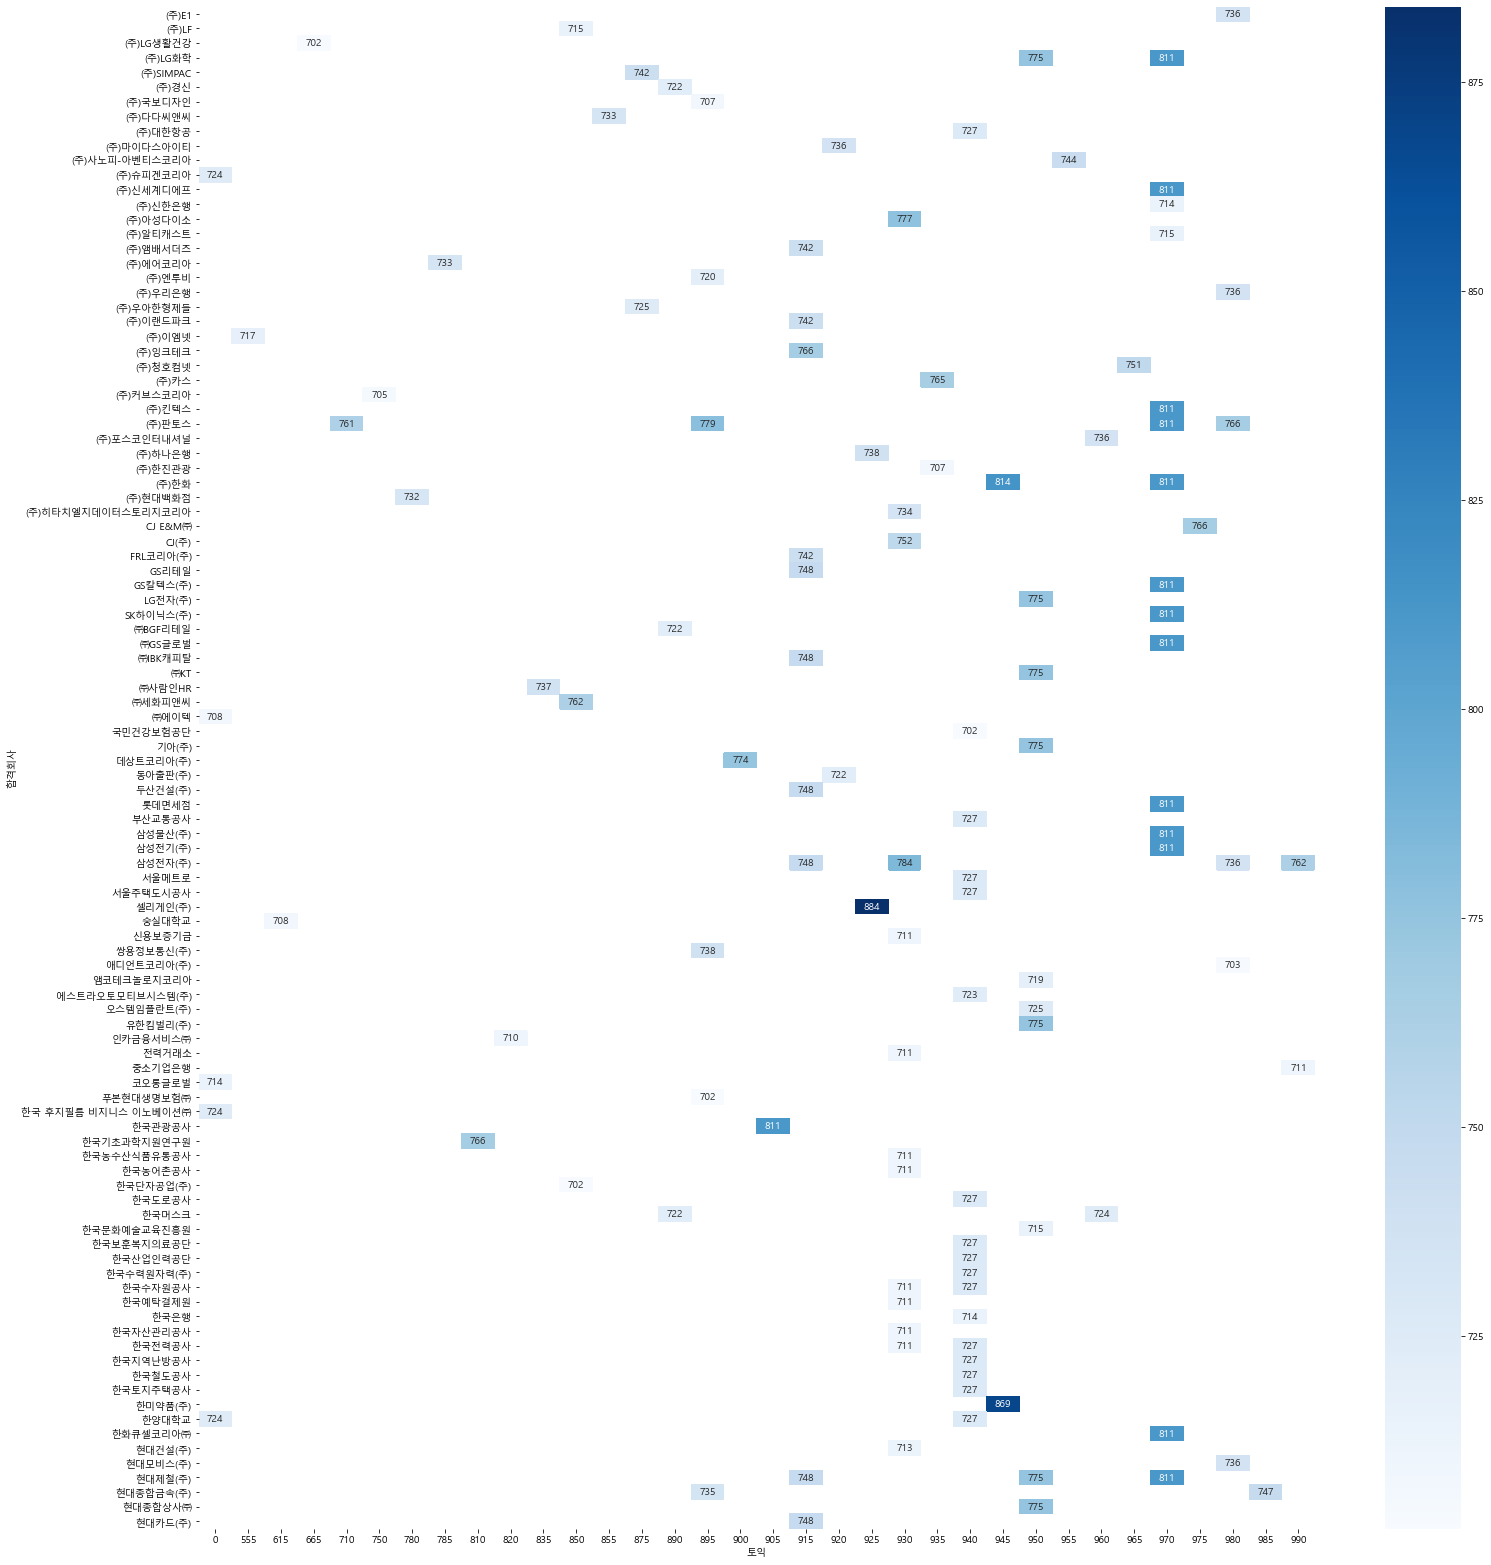

In [350]:
t = pd.pivot_table(data, index="합격회사", columns="토익", 
                   values="스펙지수").round()
plt.figure(figsize=(25, 28))
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")

<Figure size 1800x2016 with 0 Axes>

<AxesSubplot:xlabel='토익', ylabel='합격회사'>

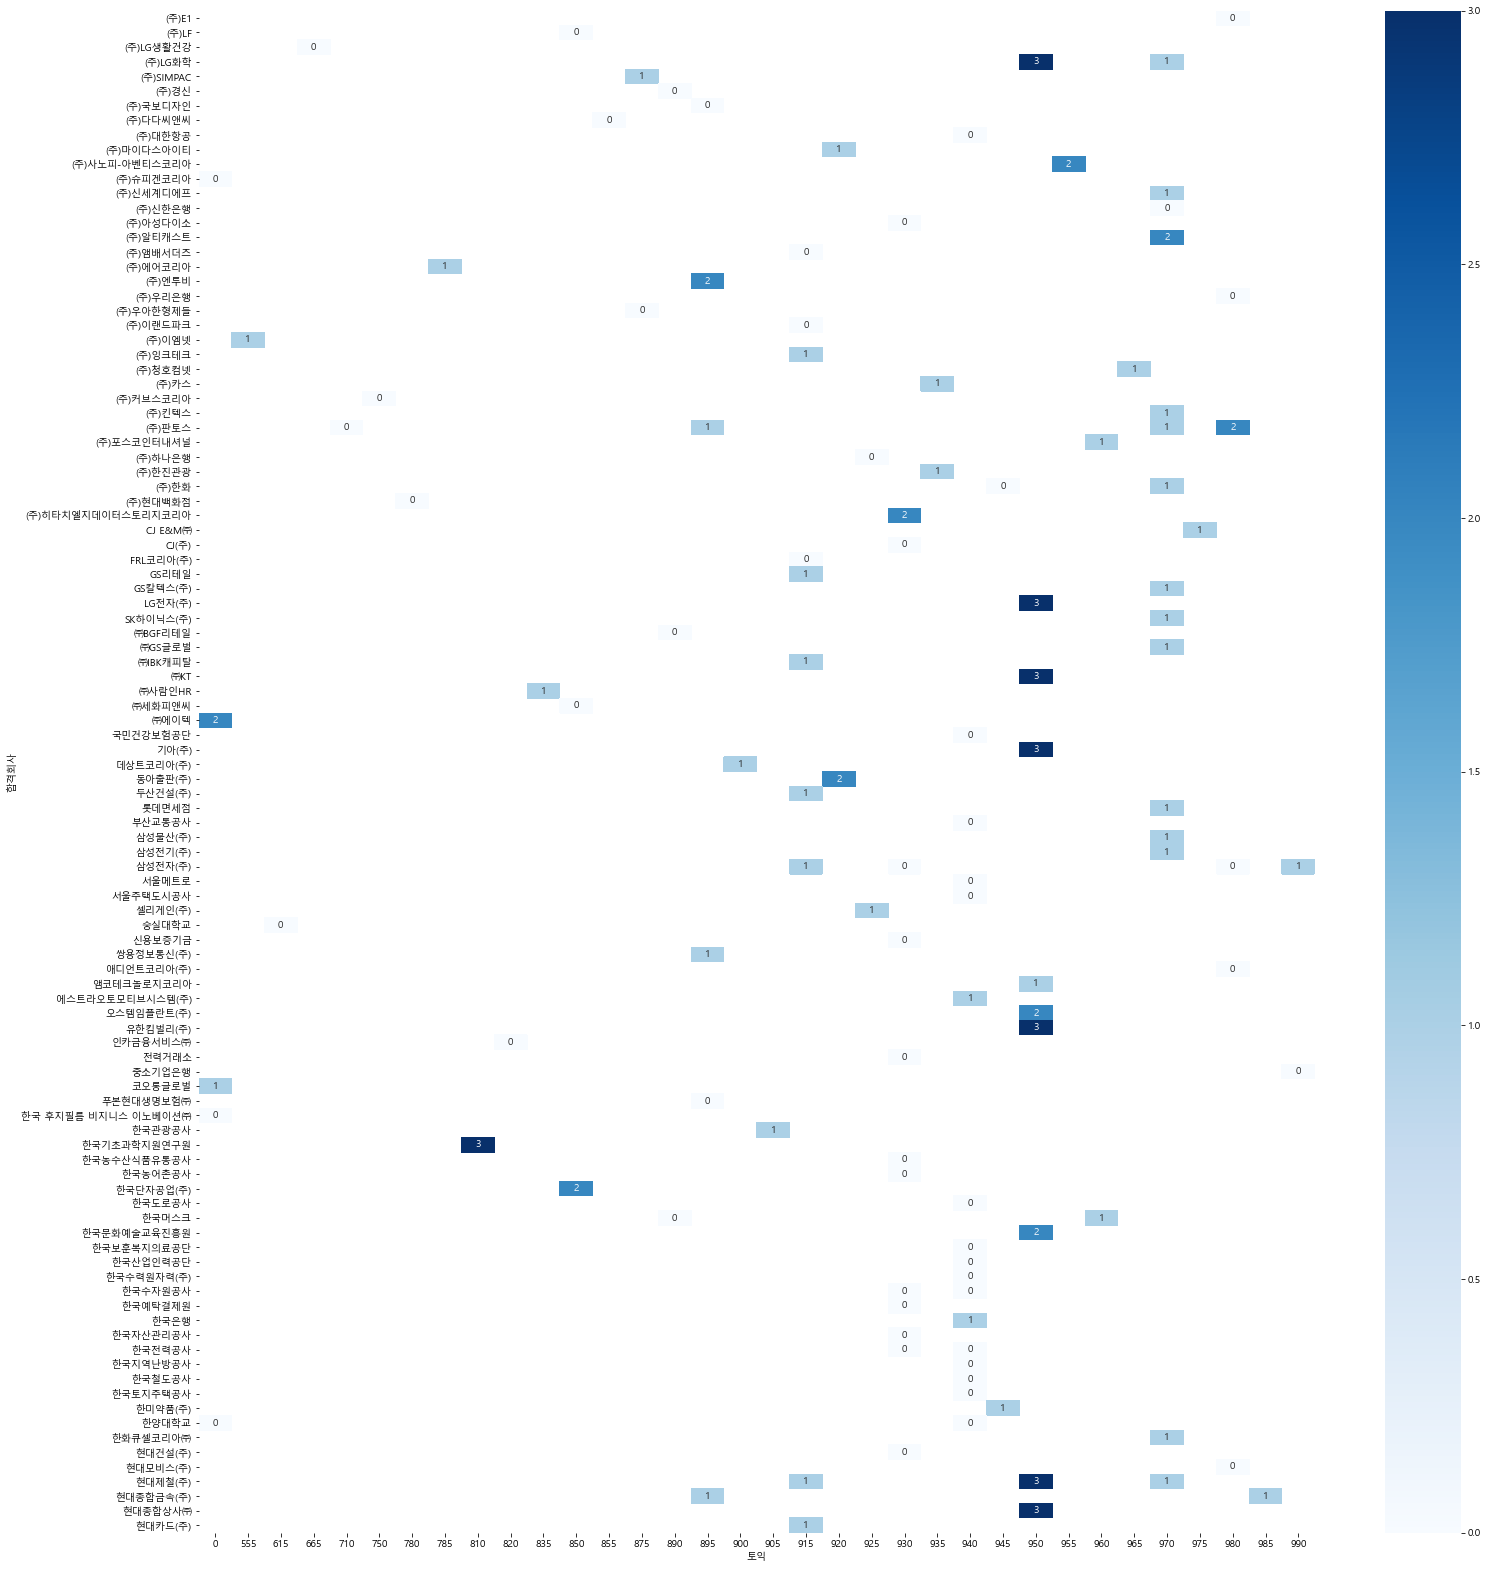

In [355]:
t = pd.pivot_table(data, index="합격회사", columns="토익", 
                   values="외국어(기타)").round()
plt.figure(figsize=(25, 28))
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")

<Figure size 1800x2016 with 0 Axes>

<AxesSubplot:xlabel='토익', ylabel='합격회사'>

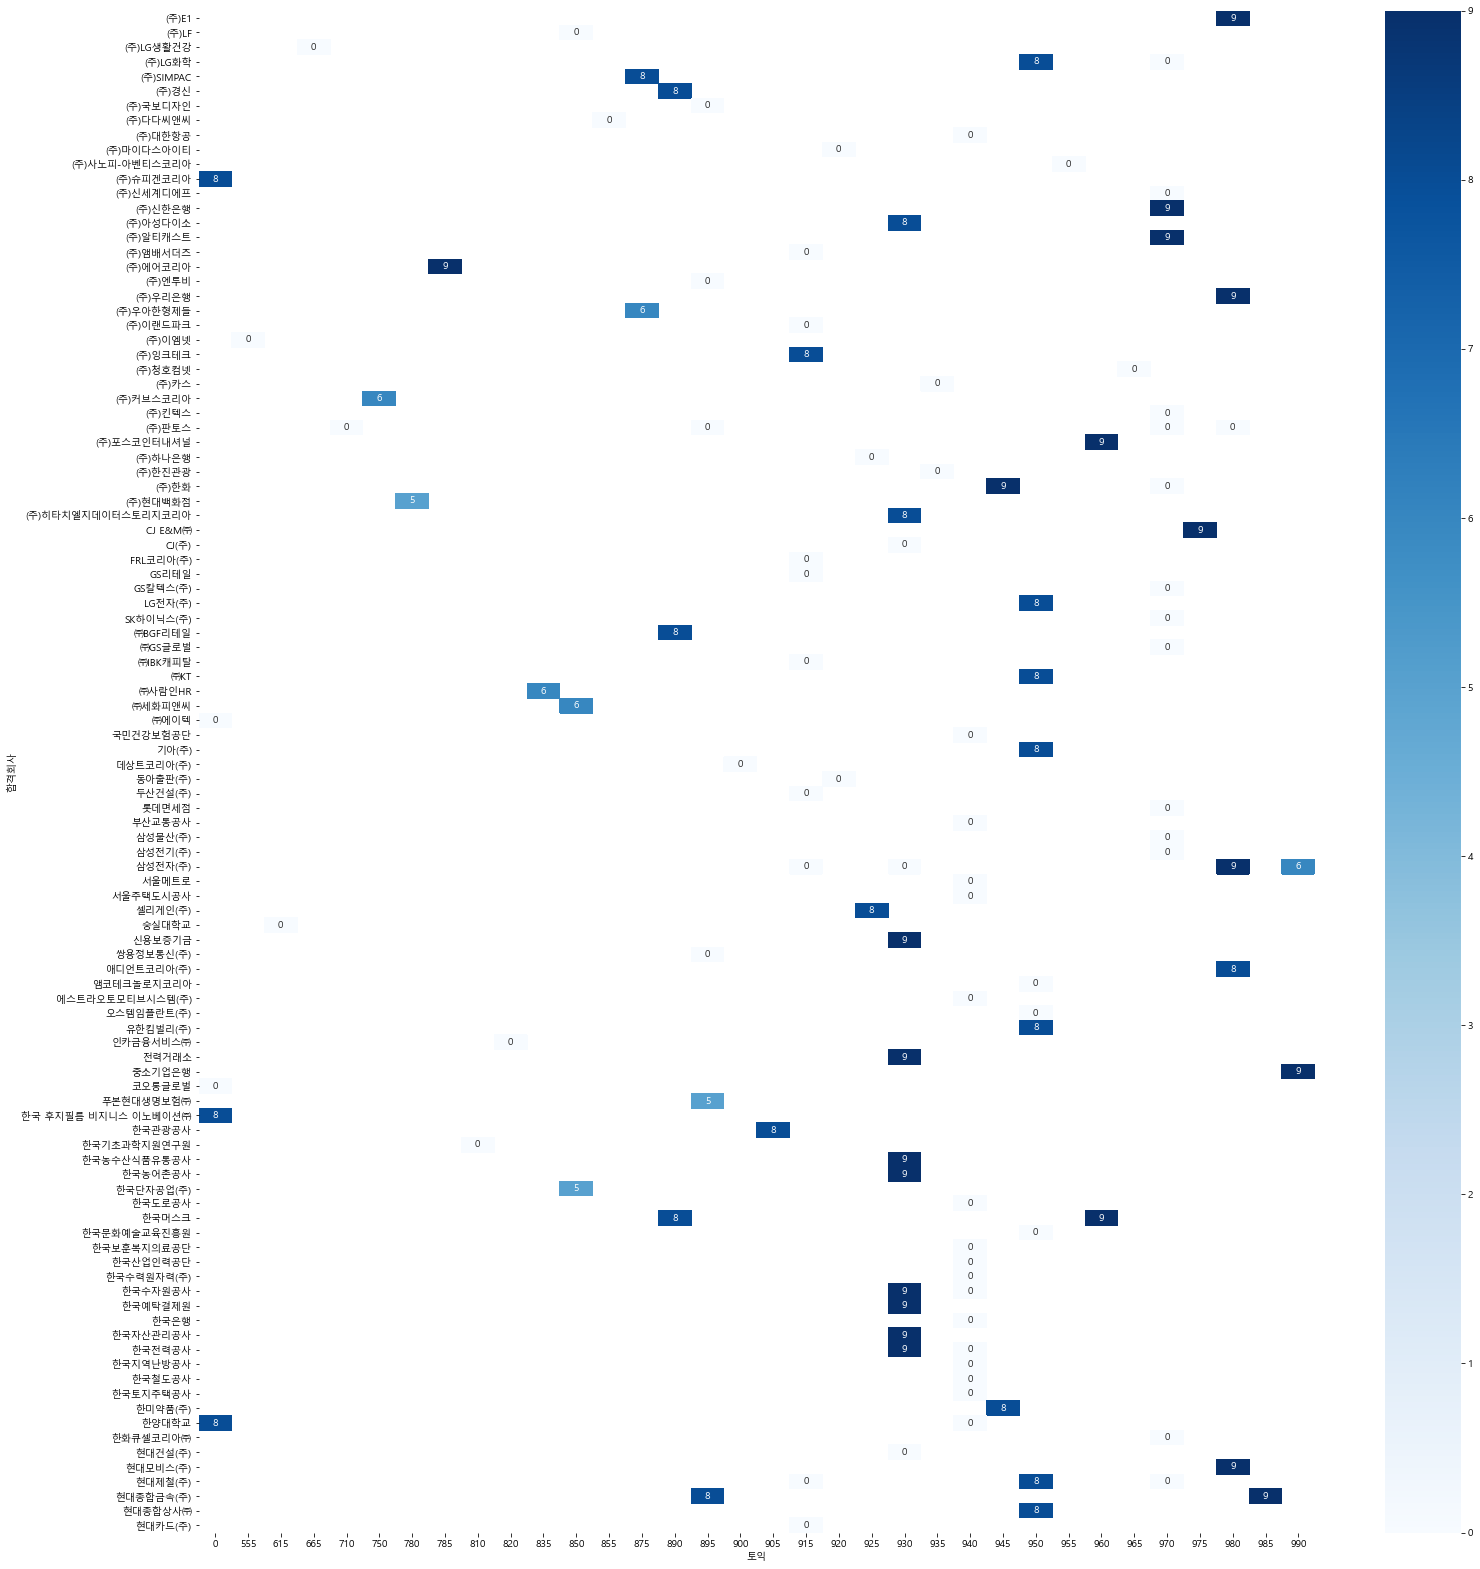

In [356]:
t = pd.pivot_table(data, index="합격회사", columns="토익", 
                   values="OPIC").round()
plt.figure(figsize=(25, 28))
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")

In [ ]:
X = data.iloc[:, 2:14]
y = data['합격회사']
y = pd.get_dummies(y)

In [281]:
X

,출신전공,스펙지수,학점,토익,토익스피킹,OPIC,외국어(기타),자격증,해외경험,인턴,수상내역,교내/사회/봉사
5,5,539,3.76,875,7,0,0,3,1,0,1,0
13,5,620,3.4,885,6,0,0,1,1,1,3,2
19,5,619,4.08,860,0,8,0,3,0,1,2,1
37,5,631,4,865,5,8,0,1,2,0,0,5
110,5,580,3.96,960,6,0,1,2,1,0,1,1
112,5,583,3.4,885,0,8,0,2,1,0,2,1
140,5,506,3.6,885,0,0,1,1,3,1,0,1
364,5,628,3.8,920,7,0,2,0,2,0,1,1
375,5,775,4.22,950,0,8,3,2,2,1,0,3
387,5,811,4.31,970,7,0,1,3,2,0,2,3


In [ ]:
y

In [282]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=34)

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score , plot_roc_curve, accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

lR = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
lr = LogisticRegression()


models = [rf, dt, kn]
for model in models:
    model.fit(X_train, y_train)
    pre = model.predict(X_test)
    scores = cross_val_score(model, X_test, y_test, cv=5).mean().round(3)
    #f1score = metrics.f1_score(y_test, y_pred).round(3)
    print(model, '\n', 'Accuracy:', scores, '\n')

RandomForestClassifier()

RandomForestClassifier() 
 Accuracy: 0.002 



DecisionTreeClassifier()

DecisionTreeClassifier() 
 Accuracy: 0.009 



KNeighborsClassifier()

KNeighborsClassifier() 
 Accuracy: 0.0 



In [ ]:
rf.feature_importances_